<a href="https://colab.research.google.com/github/rajput-t/ml_algorithms/blob/main/KMeans_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering Explained
K-Means is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping subgroups (clusters). The algorithm iteratively aims to minimize the sum of squared distances between data points and the centroid of their assigned cluster.

## PCA Explained
Principal Component Analysis (PCA) is a dimensionality reduction technique. It transforms a dataset with potentially correlated variables into a new set of uncorrelated variables called principal components. The first principal component captures the largest possible variance in the data, and each subsequent component captures the maximum remaining variance, orthogonal to the previous components. PCA is often used to reduce the dimensionality of data while retaining as much of the original variance as possible, which can help in visualization and reduce computational cost.

## Step 1: Preparing the dataset

In [74]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_iris()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 2: K-Means Clustering on Original Data

In [75]:
from sklearn.cluster import KMeans

# Apply KMeans to original data
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_original.fit(X)
df['cluster_original'] = kmeans_original.labels_
df['cluster_original']=df['cluster_original'].apply(lambda x: x-1 if x==1 or x==2 else 2)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_original
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


## Step 3: Visualize K-Means Clusters on Original Data

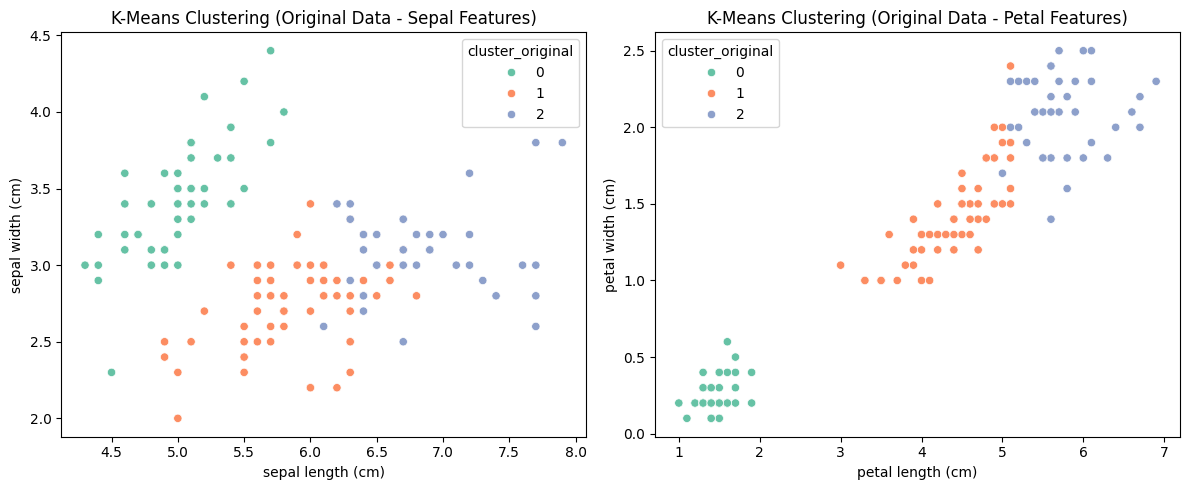

In [77]:
# Visualize clusters on original data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster_original', palette='Set2')
plt.title("K-Means Clustering (Original Data - Sepal Features)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster_original', palette='Set2')
plt.title("K-Means Clustering (Original Data - Petal Features)")

plt.tight_layout()
plt.show()

## Step 4: Dimensionality Reduction with PCA

In [78]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['pca-1', 'pca-2'])
display(df_pca.head())

,pca-1,pca-2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


## Step 5: K-Means Clustering on PCA-Transformed Data

In [86]:
# Apply KMeans to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_pca.fit(X_pca)
df_pca['cluster_pca'] = kmeans_pca.labels_
df_pca['cluster_pca']=df_pca['cluster_pca'].apply(lambda x: x-1 if x==1 or x==2 else 2)
df['cluster_pca'] = kmeans_pca.labels_ # Add to original df for comparison
df['cluster_pca']=df['cluster_pca'].apply(lambda x: x-1 if x==1 or x==2 else 2)

display(df_pca.head())

,pca-1,pca-2,cluster_pca
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


## Step 6: Visualize K-Means Clusters on PCA-Transformed Data

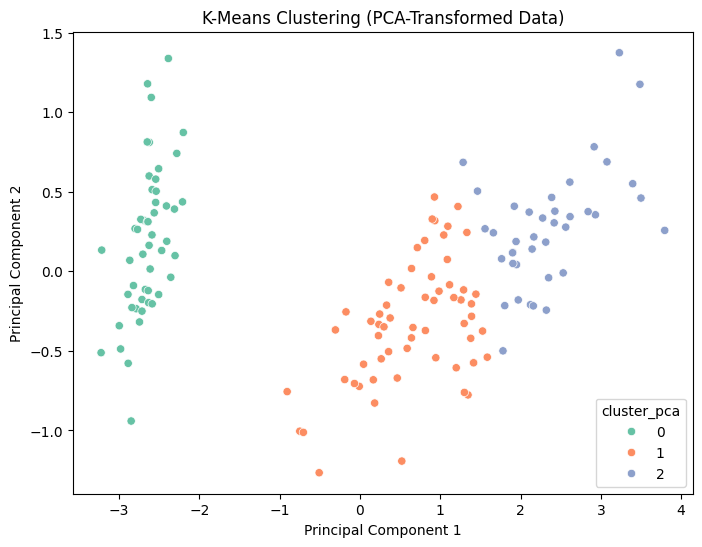

In [87]:
# Visualize clusters on PCA data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='pca-1', y='pca-2', hue='cluster_pca', palette='Set2')
plt.title("K-Means Clustering (PCA-Transformed Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Step 7: Compare Clusters to True Labels

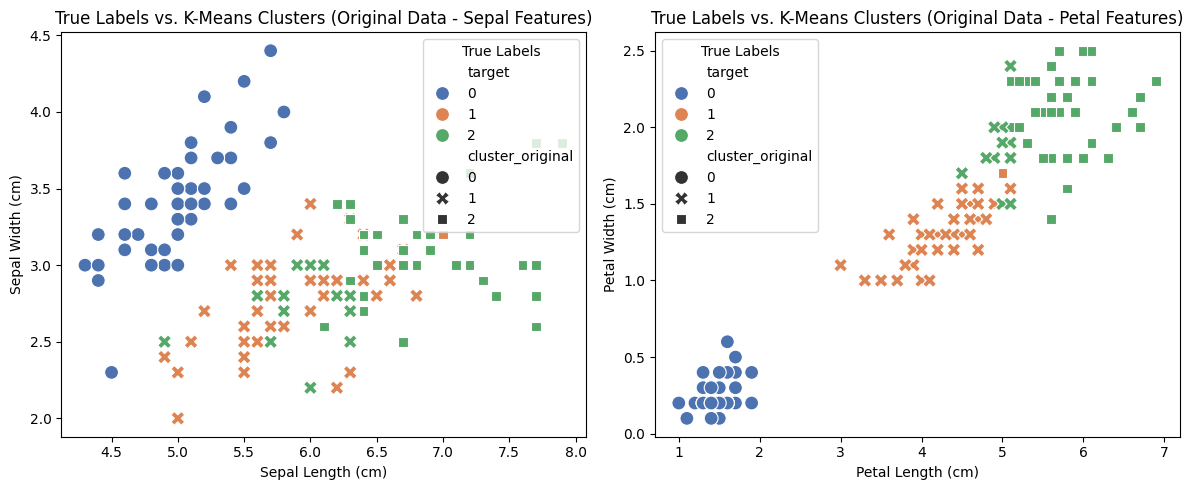

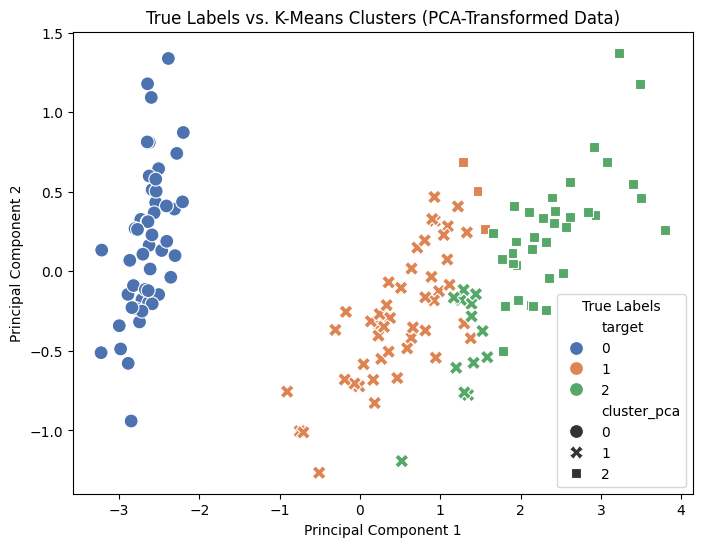

In [88]:
# Compare K-Means on Original Data clusters to true labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', style='cluster_original', palette='deep', s=100)
plt.title('True Labels vs. K-Means Clusters (Original Data - Sepal Features)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='True Labels', loc='upper right')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', style='cluster_original', palette='deep', s=100)
plt.title('True Labels vs. K-Means Clusters (Original Data - Petal Features)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='True Labels', loc='upper left')

plt.tight_layout()
plt.show()

# Compare K-Means on PCA Data clusters to true labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='pca-1', y='pca-2', hue=df['target'], style=df_pca['cluster_pca'], palette='deep', s=100)
plt.title('True Labels vs. K-Means Clusters (PCA-Transformed Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='True Labels')
plt.show()

## Step 8: Explained Variance by PCA Components

Explained variance ratio by each component: [0.92461872 0.05306648]
Total explained variance by 2 components: 0.98


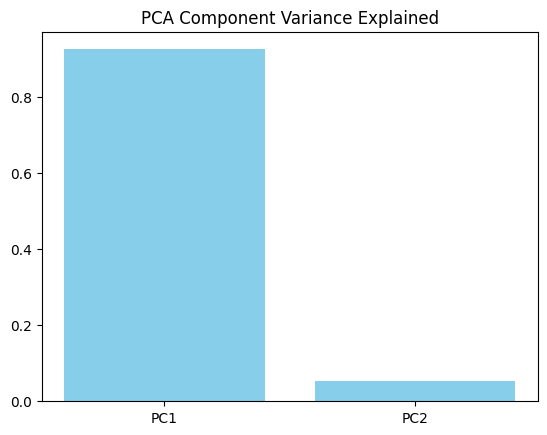

In [89]:
# Display explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio by each component: {explained_variance_ratio}")
print(f"Total explained variance by 2 components: {explained_variance_ratio.sum():.2f}")

plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_, color='skyblue')
plt.title("PCA Component Variance Explained")
plt.show()

## Step 9: Finish task

In this notebook, we performed K-Means clustering on the Iris dataset using both the original features and PCA-transformed features. We visualized the clusters in both cases and compared them to the true labels. The plots show how well K-Means was able to separate the different iris species, and the explained variance ratio from PCA indicates how much of the data's variance is captured by the principal components.